TO DO
***

**TO DO:**

Include an introduction to your notebook, setting the context and
describing what the reader can expect as they read down through
the notebook.


**

google pep 8 style code for python

**

**CLEAN UP**

`It tries to learn a smaller representation of its input (encoder) and then reconstruct its input from that smaller representation (decoder). An anomaly score is designed to correspond to the reconstruction error.`

Nice article here: https://thingsolver.com/time-series-anomaly-detection-using-a-variational-autoencoder-vae/#:~:text=It%20tries%20to%20learn%20a,)%2C%20a%20Bayesian%20neural%20network.

**Project Task:**

- On the keras5 website, there is an example of time-series anomaly detection  


- Re-create this example in a notebook of your own, explaining the concepts


- clearly explain each keras function used, referring to the documentation.


***
DELETE TO DO AFTERWARDS. JUST SOME GUIDENCE NOW. 
***



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTy_W0CYhBKCrSlAkabQWffjRke71B63ixOUA&usqp=CAU" alt="anomaly" style="width: 380px;" align=right/>


<h1 style="color: #001a79;">Anomaly Detection using Keras</h1>

<hr style="border-top: 1px solid #001a79;" />

Offical documentation: https://keras.io/examples/timeseries/timeseries_anomaly_detection/

<br>

<h2 style="color: #001a79;">Introduction</h2>

<hr style="border-top: 1px solid #001a79;" />


This notebook is a re-creation of the timeseries anomaly detection using an Autoencoder.


The goal of this notebook is to display how we can reconstruct convilutional autoencoder model to detect anomalies using a timeseries. In other words, I will use keras on top of tensorflow to build and train a model which will hopefully detect anomolies.


The following code was adapted from the official documentation cited above and also from my lectures notebook which can be found here: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/05-evaluation.ipynb



<br>

<h2 style="color: #001a79;">Importing Modules</h2>

<hr style="border-top: 1px solid #001a79;" />

In [1]:
# For numerical arrrays.
import numpy as np

# Dealing with dataframes. 
import pandas as pd

# For neural networks.
import tensorflow.keras as keras

# For data visualisation. 
from matplotlib import pyplot as plt

<h3 style="color: #001a79;">TensorFlow</h3>


Tensorflow is a platform widely using in machine learning and statistics. It purpose is to aid with data automation, model tracking, performance monitoring and model retraining. 

Offical documentation can be found here: https://www.tensorflow.org/learn

<h3 style="color: #001a79;">Keras</h3>


Keras is a deep learning API which runs on top of TensorFlow. It's purpose is to provide a simple and flexible way of experimenting with ideas and producing fast results. It is an important library for completeing research. 


Offical documentation can be accessed here: https://keras.io/

<br>

<h2 style="color: #001a79;">Loading the data</h2>

<hr style="border-top: 1px solid #001a79;" />

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

For this experiment the Numenta Anomaly Benchmark(NAB) dataset is used which can be found [here](https://www.kaggle.com/datasets/boltzmannbrain/nab). This an open source dataset is an artifical timeseries where the data is ordered, timestamped and has single-valued metrics. It is open source and contains labelled real-world time-series data which is what makes it so simple and effective to use. 

There are two csv files associated with this dataset which we will use for training and testing of data. The next code cell sets these up with their variable names. 

`artificialNoAnomaly/art_daily_small_noise.csv` contains a timestamp and some values. This csv contains articival data which doesn't contain any anomalies. This dataset will be used for training the model. 

`artificialWithAnomaly/art_daily_jumpsup.csv`also contains timestamps and values. The difference is that this file contains anomalies. This will be used for testing the model. 


In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly for training.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly for testing
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

You can have a look at the urls in our web-browser. Follow the http links provided fromthe following two cells. Here you will see the raw data for these CSVs.

In [3]:
# http for data file without anomaly for training.
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
# http for data file with anomaly for testing. 
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

<h3 style="color: #001a79;">Timeseries data without anomalies</h3>


Let's take a look at the data without anomalies using pandas to read in the csv file. 

In [5]:
# Small noise dataframe (no anomaly) for training.
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

Pandas has a lot of functionality when dealing with dataframes. I will use some of these functions to have a look at the data and ensure everything is in order. 

Offical documentation can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [6]:
# describe returns descriptive analysis of df. 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [7]:
# head returns the first 5 rows of a df. 
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [8]:
# iloc returns data at idex specified. 
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

This is interesting development. Here, iloc has shown us the first row of data. What's curious is that the value appears to have been rounded. If you took a look at the raw data in the http earlier you would have seen the first value is differs from the value produced in the previous cell. 

Have a look at a screen-snip of it

![smallnoise](images/small_noise.jpg)

<br>

The first value is 18.324918539200002 whereas my dataframe has it as 18.324919

Let's look at row one using different methods:

In [9]:
# Let's look at row 1 value.
df_small_noise.iloc[0]['value']

18.3249185392

In [10]:
# Let's look at row 1 value 1.
df_small_noise.iloc[0].values[0]

18.3249185392

In [11]:
# Gives the closest value but still rounded
df_small_noise.iloc[0].values[0] * 10e12

183249185392000.0

After a bit of digging I foung a blogpost on stackoverflow which can be found here: https://stackoverflow.com/questions/43227058/why-is-python-pandas-dataframe-rounding-my-values


Someone else ran into similar issues and one response suggested it is the percision setting of pandas. When I researched the pandas documentation I found my answer here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#frequently-used-options


It suggests that pandas is not changing the actual value but the way in which the value is displayed to us. Therefore, I have conclused that this is just a simple display issue which will not affect results when processing the data. 

<h3 style="color: #001a79;">Plotting timeseries data without anomalies</h3>

Let's take a look at our dataframe without anomalies from the small noise csv. 

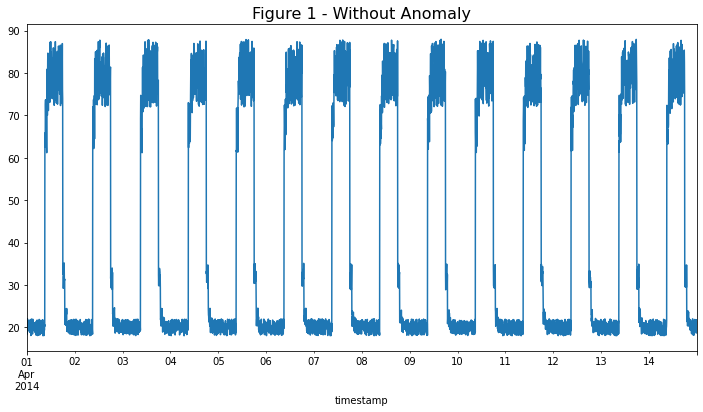

In [12]:
# Plot without anomalies. 
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Figure 1 - Without Anomaly", size=16)

# ax=ax means it will create its own seet of axes . 
df_small_noise.plot(legend=False, ax=ax);

The data in Figure 1 will be used for training the model. 

<h3 style="color: #001a79;">Timeseries data with anomalies</h3>


Let's take a look at the data with anomalies using pandas to read in the csv file. 

In [13]:
# jumpsup dataframe (eith anomaly) for testing.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [14]:
# describe returns descriptive analysis.
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [15]:
# Returns first 5 rows. 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [16]:
# iloc returns specific row
df_daily_jumpsup.iloc[0]['value']

19.761251903

We can see the same thing has happened with the displaying of data. The value of the first row is different to the raw value. However, it is only afftected when displaying data using pandas. 


![jumpsup](images/jumpsup.jpg)

In [17]:
# shape returns the dimensionality of df. 
df_daily_jumpsup.shape

(4032, 1)

<h3 style="color: #001a79;">Plotting timeseries data with anomalies</h3>

Let's plot the dataframe with anomaly data from the jumpsup csv. 

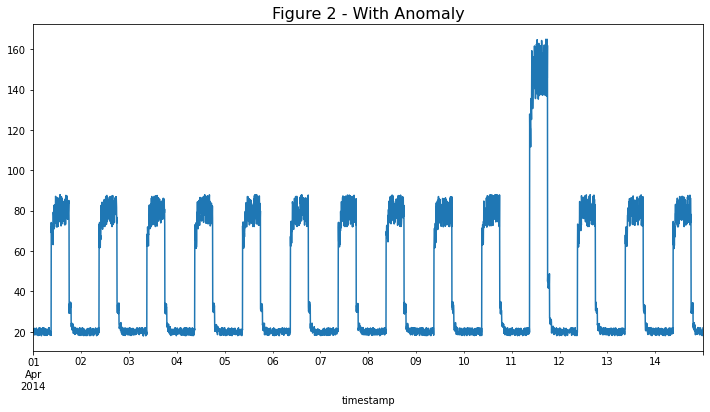

In [18]:
# Plot with anomalies. 
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Figure 2 - With Anomaly", size=16)

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

We can see here in Figure }two that there is a jump in the data and the range of the y-axis differes from Figure 1 suggesting an anomaly is present. This data will be used for testing the model. 

<br>

<h2 style="color: #001a79;">Preprocessing</h2>

<hr style="border-top: 1px solid #001a79;" />

The idea around preprocessing is to prepare data before it goes into the neural network. This is done by creating a datafrane with trained data. And then by creating a window sequence for that trained data. 

<h3 style="color: #001a79;">Training the model</h3>

This is done using the data from the small noise dataframe which we saw back in Figure 1.

First we get the mean and standard deviation of the values. The we subtract the mean of the values from each of the values and divide by the standard deviation. 

This gives use our trained data. 

In [19]:
# Get mean of df without anomaly.
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [20]:
# Get std of df without anomaly.
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [21]:
# Subtract mean and divide by std for training values. 
df_train_vals = (df_small_noise - train_mean) / train_std

In [22]:
# Have a look at training values.
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


We can create new columns for dataframes by simple assigning values to it. The next cell assigns values for mean and standard deviation which we can see in the dataframe below. 

In [23]:
# New column for mean. 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()

# New column for std. 
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [24]:
# See amended dataframe.
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [25]:
# Have a look at means for columns.
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [26]:
# Have a look at std of columns. std of value and less mean are the same. 
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

<h3 style="color: #001a79;">Plotting the trained data</h3>

Let's have a look at the trained data. 

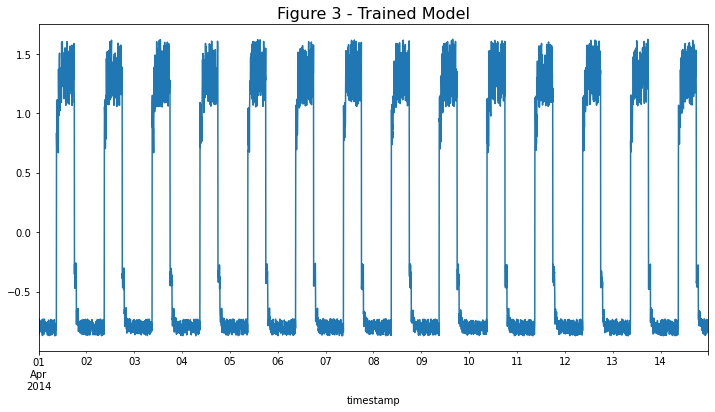

In [27]:
# Plotting the trained data
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Figure 3 - Trained Model", size=16)

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

Okay so we can see from Figure 3 that training the data has changed the results if you compare it to before it was trained in Figure 1. It's basically just scaled down the y-axis. 


The reason for this is that the standard deviation shoud always be around 1. Really this figure should be centered around zero with equal distance between the high and low values. We can see here that the high values are around 1.5 whereas the low ones are at about -0.8. This suggests there are more low values than high ones because the high ones are further away from zero. 


In any case, this shouldn't affect the trained model as it should still detect an anomaly. 

In [28]:
# Look at shape of the trained model. 
df_train_vals.shape

(4032, 1)

<h3 style="color: #001a79;">Creating a Window Sequence</h3>


What is the purpose of a window?

I found a good blog post which helps explain the meaning behind a sliding window in anomaly detection. It can be found here: https://medium.com/@krzysztofdrelczuk/time-series-anomaly-detection-with-python-example-a92ef262f09a


Basically, a sliding window is used across an array of values. Each window is the actual input the the neural network. And it will check the mean and standard deviation in each window. This is compared to the testing data. If they differ then there is an anomaly. 

<h4 style="color: #001a79;">Example of how a window works</h4>

In [29]:
# EXAMPLE OF HOW A WINDOW FUNCTION WILL WORK. 

# Dummy window list.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]

# Example window size.
win_size = 3

# Length of L.
len(L)

12

In [30]:
#Subtract number of windows from length of L.
len(L) - (win_size - 1)

10

In [31]:
# Remove brackets and gives the same response.
len(L) - win_size + 1

10

In [32]:
# Print the windows from i up to i plus the window size. 
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [33]:
# For accumulating the windows.
wins = []

# Generate the windows and add to list.
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

Numpy has a has quite a useful method called stack. Basically, it takes in a sequence for example a the wins list. And it returns these wins in a single numpy array. 

Offical documentation can be found here: https://numpy.org/doc/stable/reference/generated/numpy.stack.html

In [34]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

<h3 style="color: #001a79;">Generating the window sequence</h3>

Now that we understand how create a sliding window and what it is used for we need to generate one for the training model. 

In [35]:
# Setting the window size for trained model. 
window_size = 288

In [36]:
# Function to create the window.
def windows(vals, N=window_size):
  # Start with an empty list.
  L = []
  # loop through all possible windows
  for i in range(len(vals) - N + 1):
    # Append window to list.
    L.append(vals[i:i+N])
  # Stack them in np array. 
  return np.stack(L)

This function takes the values and the window size. Loops through all the possible windows of those values, appends them to a list and converts that list into a numpy array. 

In [37]:
# Create the window sequence for training values. 
x_train = windows(df_train_vals)

Now that the window sequences have been created lets compare the first and last values of the windows to the first and last values of the training model. 

In [38]:
# Shows first and last values of the windows array.  
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [39]:
# Shows frist and last values of the training values. 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

Okay so we can see they're pretty much the same which is good. Pandas has rounded the values again but as already stated this won't affect my results. 

In [40]:
# Check the shape
x_train.shape

(3745, 288, 1)

In [41]:
# Pull out values of the training model. 
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

Numpy has another useful method flatten. This take a 2D arrray and flattens it into one dimension. The reason we are flattening this is so we can use it more efficently in the neural network. 

Offical documentation can be found here: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

In [42]:
# FLATTEN GETS RID OF ALL INNER ARRAYS AND FLATTENS THEM OUT
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

<h3 style="color: #001a79;">Plotting the Window Sequence</h3>

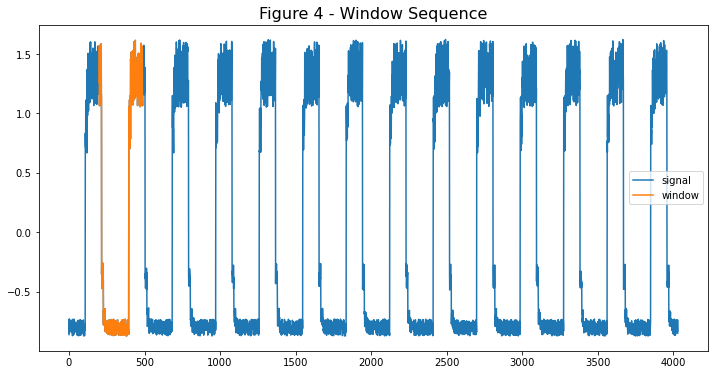

In [46]:
# Assign window number
window_no = 200

# Plotting the window
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Figure 4 - Window Sequence", size=16)

# Pull out training values for y
y = df_train_vals['value'].values

# Create an array
ax.plot(np.arange(y.shape[0]), y, label='signal')

# Assign the first window. 
w = x_train[window_no].flatten()

# PLot the first windw on top the the training values.
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

<br>

<h2 style="color: #001a79;">Neural Network</h2>

<hr style="border-top: 1px solid #001a79;" />

A neural network is like a basket of neurons. These neurons take in inputs and give outputs. The neurons in the network are all connected. An example of a neural network is Google's search algorithm. A search is input in and google returns an output of results based on that input. 

For more on neural networks check out this nice blog I found: https://www.ibm.com/cloud/learn/neural-networks

In [47]:
# Check out the shape of the window sequence
x_train.shape

(3745, 288, 1)

<h3 style="color: #001a79;">Layers</h3>

The keras documentation states that layers are like building blocks for neural networks. In other words, each layer contributes to the foundation of the neural network. It is important to note that the way the layers are listed below is the exact order in which the blocks will be built. So you can see below that some layers are used multiple times. This is part of the design of the neural network. 


Let's explore some of the layers in the cell below:

- `Input` - the input layer decides the shape of the network. In the cell below I have passed in the trained input shape and the trained output shape. It is possible to only select an inpupt shape, however, the idea of the training model is to train the input and output so that when an anomaly occures it can be detected. 



- `Conv1D` - the 1D convolution layer is important as it combines two signals to form a third one. In other words, the relationship between the input and output is expressed through this third signal. This is a good blogpost about the meaning behind convolution: https://www.tutorialspoint.com/what-is-convolution-in-signals-and-systems



- `Dropout` - the dropout layer is used to input units to 0 with the specified rate. The idea of this is to prevent overfitting. In other words, we don't have the results produced to return the exact same data. 



- `Conv1DTranspose` - the 1D convolution transpose layer does what the basic convolution layer does but with a modified input feature map. What this means is that the it is taking in the input signal, transforming it a bit and combining it with the output signal and give a thrid signal. 



Offical documentation can be found here: https://keras.io/api/layers/#:~:text=Layers%20are%20the%20basic%20building,variables%20(the%20layer%27s%20weights).

In [ ]:
# Building block for neural network.
layers = [
  # Determine shape of neural network.
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  # To combine 1D signals.
  keras.layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # To prevent overfitting.
  keras.layers.Dropout(rate=0.2),
  # To combine 1D signals again.
  keras.layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # To combine 1D signals while transforming input signal
  keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #To prevent overfitting again.
  keras.layers.Dropout(rate=0.2),
  # To combine 1D signals while transforming input signal again.
  keras.layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # To combine 1D signals while transforming input signal again.
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [ ]:
# SAYS ORDER THAT THE ORDER IN WHICH THEY ARE LISTED IS THE WAY
# THE WAY THE NEURAL NETWORK WILL BE BUILT ON 
model = keras.Sequential(layers)

In [ ]:
# ADAPTAVIE STITASTIC GRADIENT ASSENT  
# LOADS AVAILABLE ONLINE ABOUT THE ADAM OPTIMIZER 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# complile it - LOADS OUT THERE ON LOSS MSE
model.compile(optimizer=optimizer, loss="mse")

In [ ]:
# summary of dataset
model.summary()


**

google model.fit keras 

**

trains the model on both the input and output.  

In [ ]:
# NEURAL NETWROK IS RECIEVEING THE XTRAIN AND THE INPUT AND OUTPUT

# 
history = model.fit(
    x_train, # XTRAIN PASSED IN TWICE - THIS IS NB GOOGLE
    x_train,
    epochs=50,
    batch_size=128, # HOW MANY WINDOWS PUSHED IN AT ONE TIME
    validation_split=0.1, # 10% HELD BACK FOR VALIDATION
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

<h2 style="color: #001a79;">Conclusion</h2>

<hr style="border-top: 1px solid #001a79;" />

To do:

Include a conclusion section where you suggest improvements you
could make to the analysis in the notebook.


RE FACTURING THE CODE. TAKEING SOMEONE ELSES CODE AND MAKING IT OUT OWN. CLEANING IT UP. MAKING IT/ EXPLAINING WHAT IT DOES. 

TRYING TO WRITE A NARRATIVE AROUND IT. 

<hr style="border-top: 1px solid #001a79;" />

<h2 style="color: #001a79;">End</h2>